In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import train_test_split
df=pd.read_csv("insurance.csv")

In [97]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [98]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [99]:
df.shape

(1338, 7)

In [100]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

/Users/harikrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribuition')

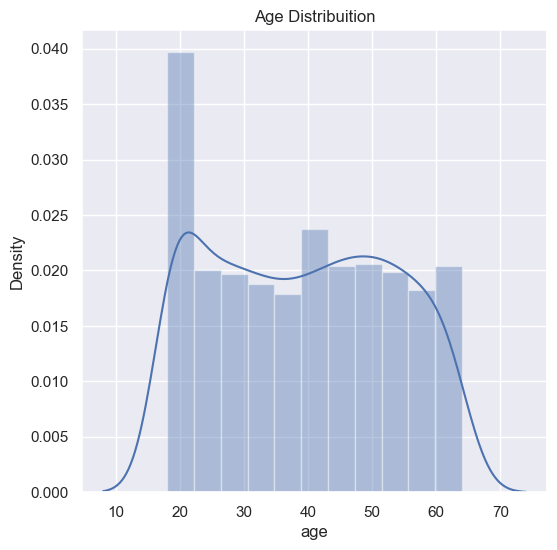

In [101]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df.age)
plt.title('Age Distribuition')

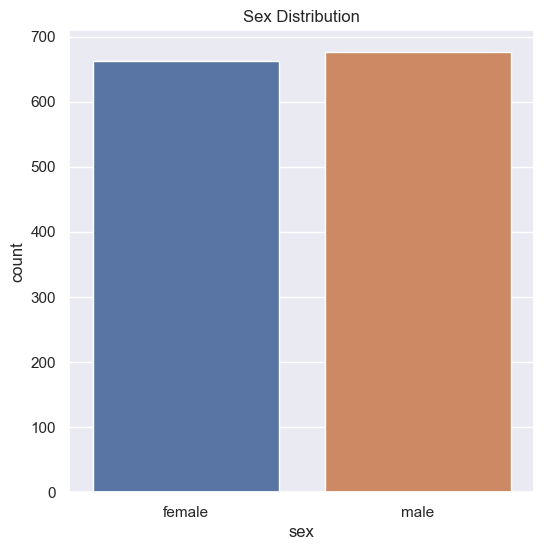

In [102]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

In [103]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/Users/harikrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribuition')

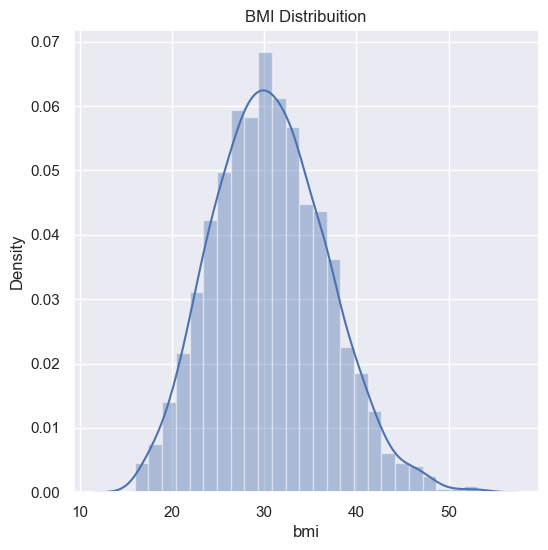

In [104]:
#BMI distribution

plt.figure(figsize=(6,6))
sns.distplot(df.bmi)
plt.title('BMI Distribuition')

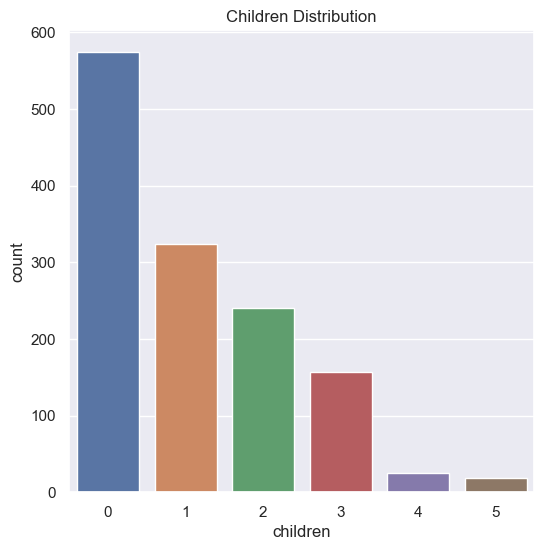

In [105]:
#Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children Distribution')
plt.show()

In [106]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

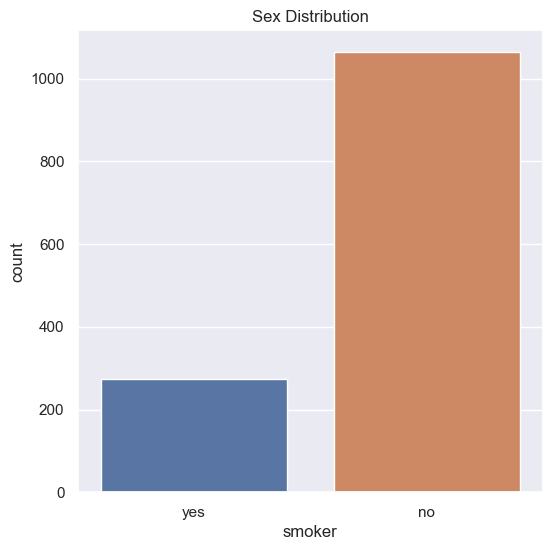

In [107]:
#Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Sex Distribution')
plt.show()

In [108]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/Users/harikrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Charges Distribuition')

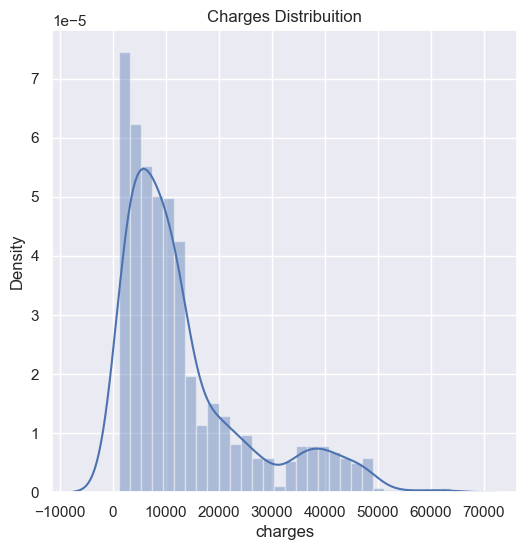

In [109]:

plt.figure(figsize=(6,6))
sns.distplot(df.charges)
plt.title('Charges Distribuition')

In [110]:
#Encoding all the categorical columns
df.replace({'sex':{'male':0, 'female':1}},inplace=True)

In [111]:
df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

In [112]:
df.replace({'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [113]:
#Spliting the features

X=df.drop(columns='charges',axis=1)

Y=df.charges


In [114]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [115]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [116]:
#Training & Testing Data

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [118]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [119]:
model = LinearRegression()

In [120]:
model.fit(X_train,Y_train)

LinearRegression()

In [128]:
#training data prediction

training_data_prediction=model.predict(X_train)

In [129]:
#R_squared Value
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [130]:
print(r2_train)

0.751505643411174


In [131]:
test_data_prediction=model.predict(X_test)

In [133]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)

In [134]:
print(r2_test)

0.7447273869684077


In [158]:
#Building a predictive system

input_data=(31,1,25.74,0,1,0)

In [159]:
input_data_array = np.array(input_data)

In [160]:
input_data_reshaped=input_data_array.reshape(1,-1)


In [161]:
prediction =model.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


/Users/harikrishnan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [163]:
print('The insurance cost is USD',prediction[0])

The insurance cost is USD 3760.080576496046


In [1]:
#THE MODEL IS PREDICTING ACCURATELY